In [1]:
import numpy as np 
import pandas as pd

## Reading dataset

In [2]:
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('diabetes.csv')

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.shape

(768, 9)

In [6]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


##### There is no categorical data.

In [8]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

##### There is no null values present.

In [9]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


- min value for Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI is zero. which can't be correct as no one has BloodPressure of zero.
- which means there is missing value in form of 0.
- we have to handle this values.
- We can use mean or median for filling 0 values
- As there is no significance difference between mean and median(50%), we can use mean as filling values.

In [10]:
df['Glucose'] = df['Glucose'].replace(0, df['Glucose'].mean())
df['BloodPressure'] = df['BloodPressure'].replace(0, df['BloodPressure'].mean())
df['SkinThickness'] = df['SkinThickness'].replace(0, df['SkinThickness'].mean())
df['Insulin'] = df['Insulin'].replace(0, df['Insulin'].mean())
df['BMI'] = df['BMI'].replace(0, df['BMI'].mean())

- Pregnancies can have 0 values

In [11]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [12]:
# Handle duplicates
duplicate_rows_data = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_data.shape)

number of duplicate rows:  (0, 9)


- No duplicates present 

## Visualization

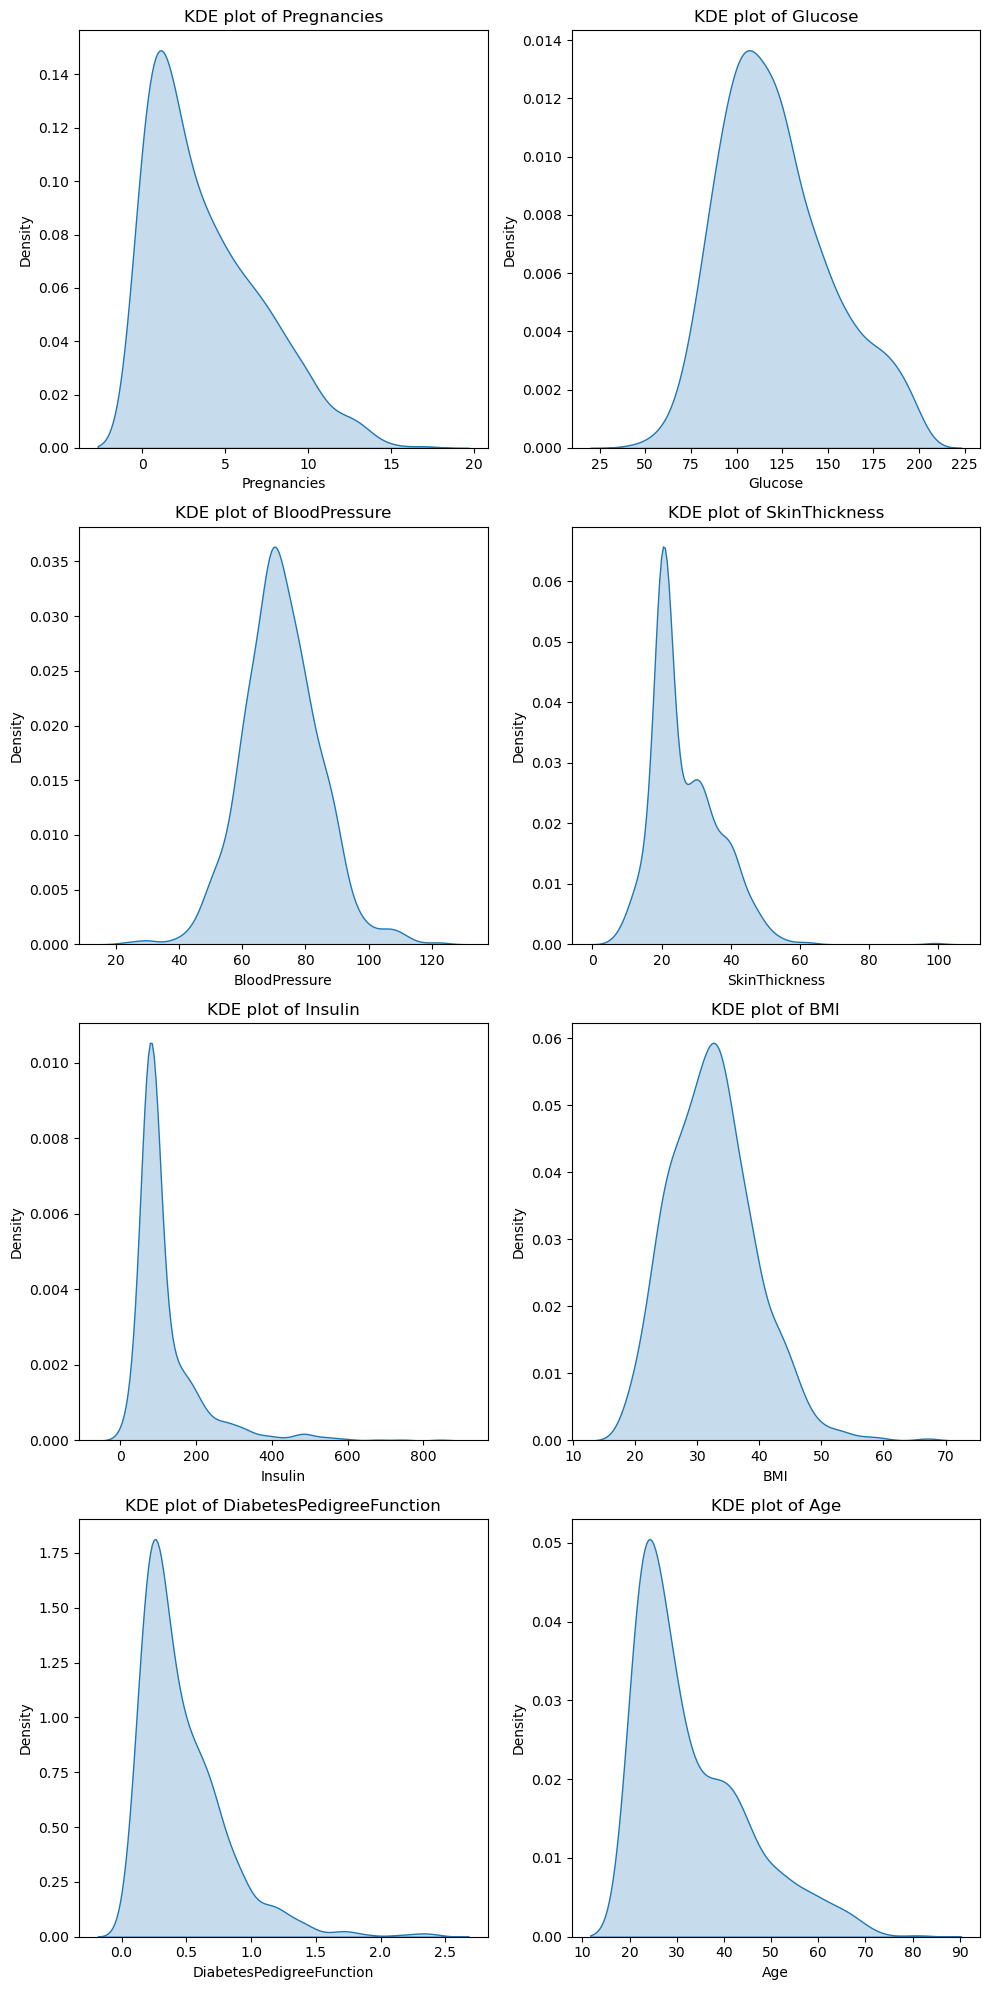

In [13]:
# Kernel Density Estimate (KDE) plots for each variable
num_columns = len(df.columns.drop('Outcome'))
num_rows = (num_columns + 1) // 2

plt.figure(figsize=(10, 5*num_rows))
for i, column in enumerate(df.columns.drop('Outcome')):
    plt.subplot(num_rows, 2, i+1)
    sns.kdeplot(data=df[column], fill=True)
    plt.title(f'KDE plot of {column}')

plt.tight_layout()
plt.show()

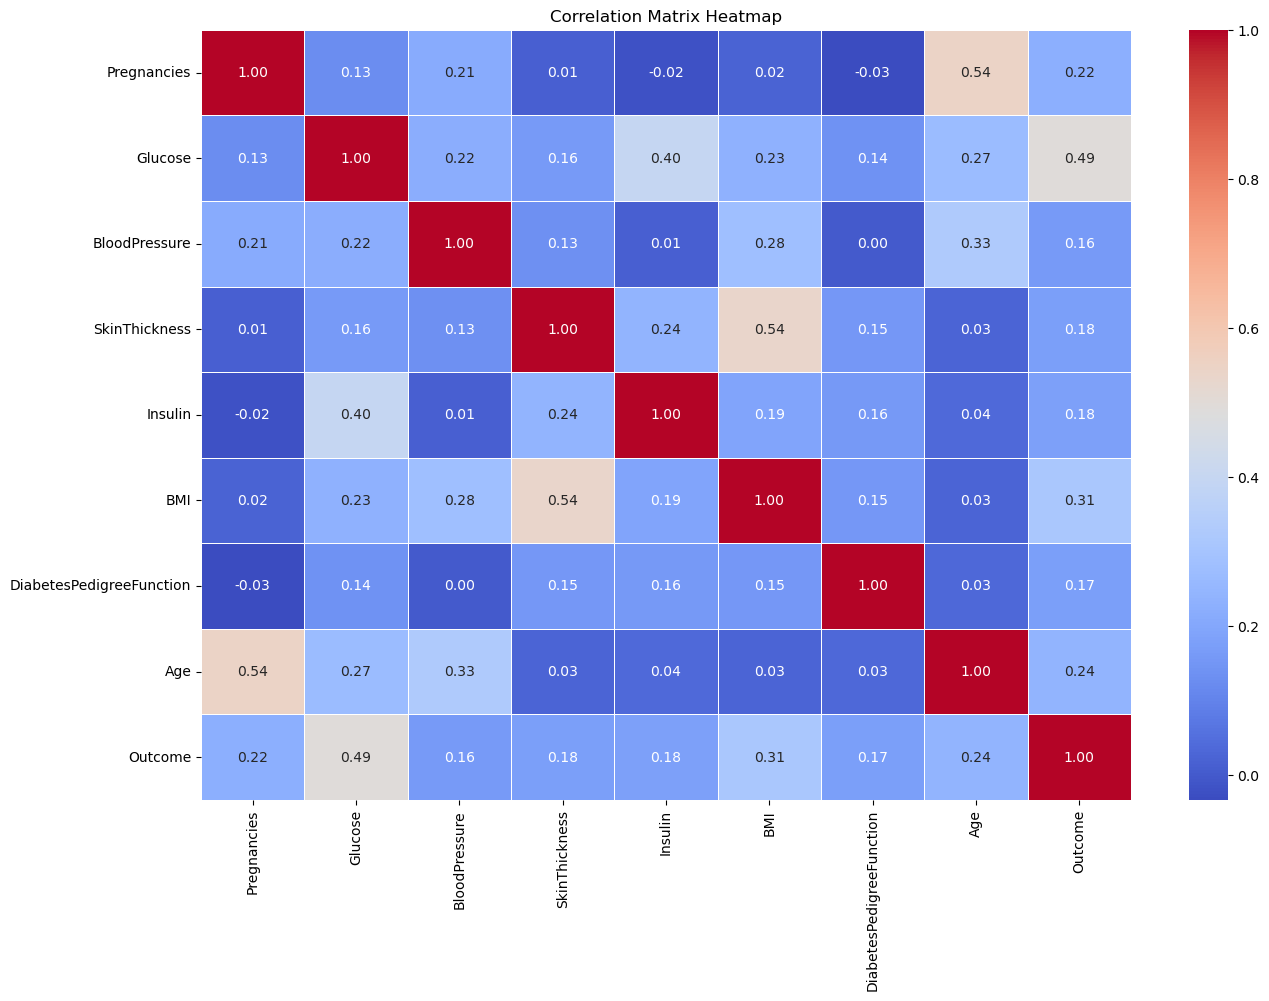

In [14]:
corr = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title("Correlation Matrix Heatmap")
plt.show()

- There is no multicollinearity present.

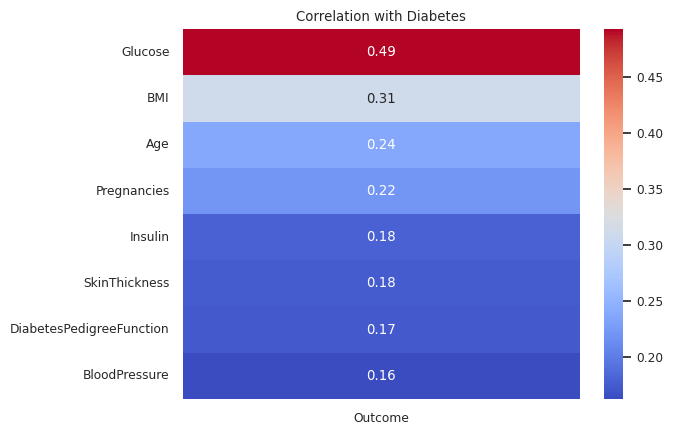

In [15]:
corr = df.corr()
target_corr = corr['Outcome'].drop('Outcome')

target_corr_sorted = target_corr.sort_values(ascending=False)

sns.set(font_scale=0.8)
sns.set_style("white")
sns.set_palette("PuBuGn_d")
sns.heatmap(target_corr_sorted.to_frame(), cmap="coolwarm", annot=True, fmt='.2f')
plt.title('Correlation with Diabetes')
plt.show()

- With a correlation of 0.49, Glucose is the most strongly correlated feature with the outcome. This suggests that higher glucose levels could be a significant indicator of diabetes.
- BMI can be also important factor in diabetes.

<AxesSubplot: >

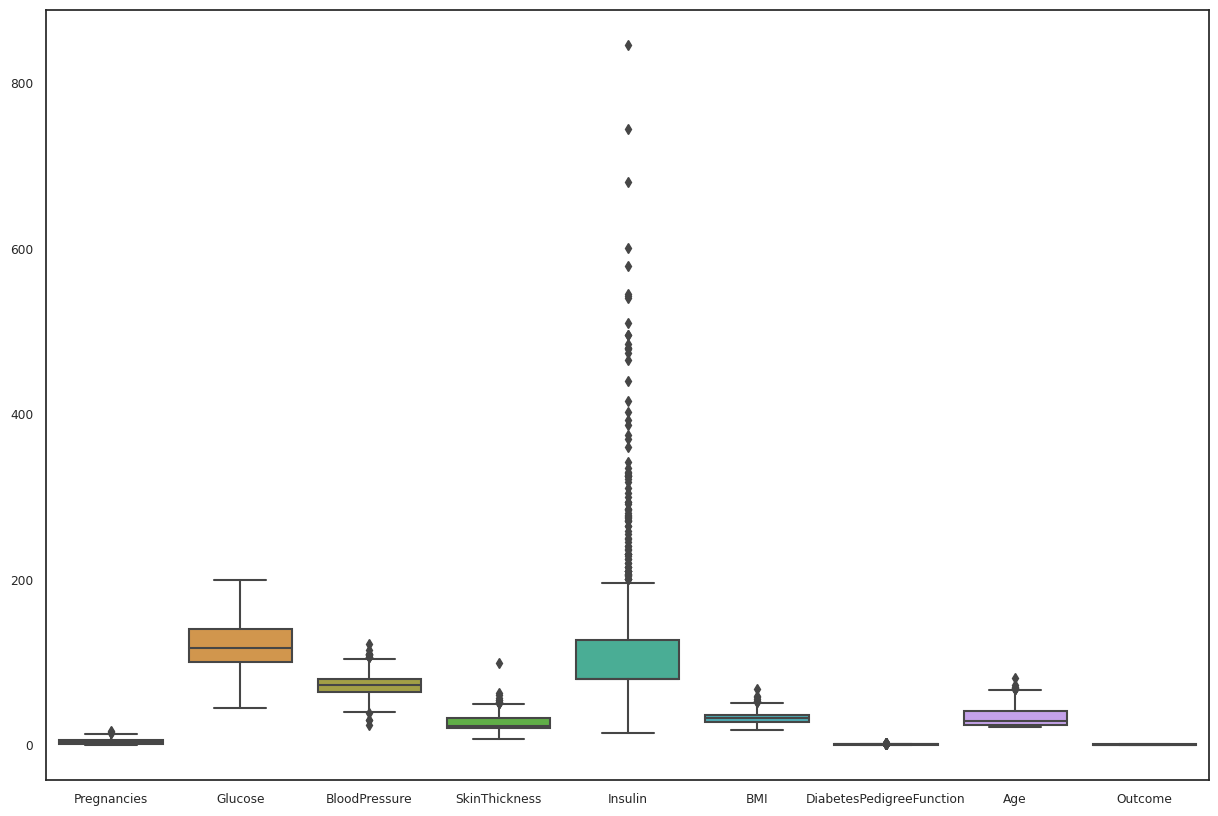

In [16]:
plt.figure(figsize=(15,10))
sns.boxplot(df)

- There are many outliers in Insulin, which can be handeled using scalling the data.

## Data splitting and Scaling

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
import pickle

- Splitting

In [18]:
x = df.drop(columns = ['Outcome'])
y = df['Outcome']

In [19]:
x.head(4)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21


In [20]:
y.head(4)

0    1
1    0
2    1
3    0
Name: Outcome, dtype: int64

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=30)

In [22]:
x_train.shape

(537, 8)

In [23]:
x_test.shape

(231, 8)

In [24]:
y_train.shape , y_test.shape

((537,), (231,))

- Scaling

In [25]:
def std_scaler(x_train, x_test):
    scaler = StandardScaler()
    x_train_scaled = scaler.fit_transform(x_train)
    x_test_scaled = scaler.transform(x_test)
    
    # Saving the pickle of scaler 
    file = open('StandardScaler.pkl','wb')
    pickle.dump(scaler, file)
    file.close()
    
    return x_train_scaled, x_test_scaled

In [26]:
x_train_scaled, x_test_scaled = std_scaler(x_train, x_test) 

In [27]:
x_train_scaled[:5]

array([[-0.84683171, -0.66549311,  0.12373527, -0.62954654, -0.41643345,
         0.98331968, -0.54773782,  0.69285995],
       [ 2.21544863, -1.2277813 ,  0.12373527, -0.62954654, -0.41643345,
        -0.33469282, -0.527377  ,  0.11370483],
       [-0.84683171, -0.16935648, -1.05505077, -0.37925901, -0.13848747,
         0.18409934, -0.04453488, -0.54818672],
       [-0.23437565, -1.3600844 ,  1.13412331, -1.09043542, -0.56282404,
        -0.69924946, -0.50992488, -0.96186895],
       [ 1.60299256,  0.02909817, -0.21306074,  1.75427024, -0.26578844,
         0.08594947, -0.31213413,  0.52738706]])

In [28]:
x_test_scaled[:5]

array([[-1.15305975, -0.69856889,  0.29213328, -0.62954654, -0.41643345,
         0.45050612, -0.82406313, -0.63092317],
       [-0.23437565, -0.53319001, -1.56024479, -0.58245227,  0.41315006,
        -0.22252154, -0.5506465 , -0.79639606],
       [ 1.90922059, -1.55853905,  0.7973273 , -0.62954654, -0.41643345,
         0.11399229, -0.63499844,  0.36191417],
       [-0.84683171,  0.72368946,  0.7973273 ,  1.34788371, -0.41643345,
         1.23570505,  0.36559006, -0.46545028],
       [ 0.07185239, -0.26858381, -0.71825476, -0.62954654, -0.41643345,
        -0.50294973, -1.03348863, -0.79639606]])

## Models Training

### MODEL 1 - Logistic Regression

In [29]:
Model1=LogisticRegression()

In [30]:
Model1.fit(x_train_scaled, y_train)

LogisticRegression()

In [31]:
y_pred1 = Model1.predict(x_test_scaled)
y_pred1

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [32]:
print('This is the confusion matrix for Logistic Regression :\n', confusion_matrix(y_test, y_pred1))
print('\n')
print('This is the Accuracy for the Logistic Regression :\n', accuracy_score(y_test, y_pred1))
print('\n')
print('This is the classification report for the Logistic Regression :\n \n' , classification_report(y_test, y_pred1))

This is the confusion matrix for Logistic Regression :
 [[140  19]
 [ 27  45]]


This is the Accuracy for the Logistic Regression :
 0.8008658008658008


This is the classification report for the Logistic Regression :
 
               precision    recall  f1-score   support

           0       0.84      0.88      0.86       159
           1       0.70      0.62      0.66        72

    accuracy                           0.80       231
   macro avg       0.77      0.75      0.76       231
weighted avg       0.80      0.80      0.80       231



- Accuracy of the model is 0.74
- FN and FP both values are important here so we also consider precision, recall and f1-score as important factors, but they are also has good amount of values.
- Precision = 0.79, recall = 0.82, f1-score = 0.81

## MODEL 2 - Logistic regression using Hypertunning

In [49]:
## Hypertunning 

## GridSearchCV
from sklearn.model_selection import GridSearchCV

In [50]:
parameters = {
    'penalty' : ['l1', 'l2', 'elasticnet', None],
    'C' : np.logspace(-3,3,7),
    'solver' : ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
}

In [51]:
Model2 =LogisticRegression()

In [66]:
clf = GridSearchCV(
    Model2,
    param_grid=parameters,
    scoring='accuracy',
    cv=10
)
clf.fit(x_train_scaled, y_train)

GridSearchCV(cv=10,
             estimator=LogisticRegression(C=0.1, penalty='l1', solver='saga'),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']},
             scoring='accuracy')

In [67]:
clf=GridSearchCV

In [71]:
Model2 = LogisticRegression()
clf = GridSearchCV(
    Model2,
    param_grid=parameters,
    scoring='accuracy',
    cv=10
)
clf.fit(x_train_scaled, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']},
             scoring='accuracy')

In [72]:
# best parameters
clf.best_params_

{'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}

In [73]:
clf.best_score_

0.759643605870021

In [74]:
Model2 = LogisticRegression(C=0.1, penalty='l1', solver='saga')
Model2.fit(x_train_scaled, y_train)

LogisticRegression(C=0.1, penalty='l1', solver='saga')

In [75]:
y_pred2 = Model2.predict(x_test_scaled)

In [76]:
print('This is the confusion matrix for GridSearchCV :\n', confusion_matrix(y_test, y_pred2))
print('\n')
print('This is the Accuracy for GridSearchCV :\n', accuracy_score(y_test, y_pred2))
print('\n')
print('This is the classification report for GridSearchCV :\n \n' , classification_report(y_test, y_pred2) )

This is the confusion matrix for GridSearchCV :
 [[142  17]
 [ 31  41]]


This is the Accuracy for GridSearchCV :
 0.7922077922077922


This is the classification report for GridSearchCV :
 
               precision    recall  f1-score   support

           0       0.82      0.89      0.86       159
           1       0.71      0.57      0.63        72

    accuracy                           0.79       231
   macro avg       0.76      0.73      0.74       231
weighted avg       0.79      0.79      0.79       231



- The Accuracy score  for Model 2 is : 0.7922077922077922

## Model-3 Decision Tree

In [60]:
from sklearn.tree import DecisionTreeClassifier
Model3 = DecisionTreeClassifier(criterion='entropy')

In [61]:
Model3.fit(x_train_scaled, y_train)

DecisionTreeClassifier(criterion='entropy')

In [63]:
from sklearn import tree

[Text(0.4685344827586207, 0.96875, 'x[1] <= 0.178\nentropy = 0.947\nsamples = 537\nvalue = [341, 196]'),
 Text(0.15258620689655172, 0.90625, 'x[5] <= -0.846\nentropy = 0.749\nsamples = 341\nvalue = [268, 73]'),
 Text(0.06551724137931035, 0.84375, 'x[4] <= -0.748\nentropy = 0.089\nsamples = 89\nvalue = [88, 1]'),
 Text(0.05172413793103448, 0.78125, 'x[1] <= -0.599\nentropy = 0.503\nsamples = 9\nvalue = [8, 1]'),
 Text(0.03793103448275862, 0.71875, 'entropy = 0.0\nsamples = 8\nvalue = [8, 0]'),
 Text(0.06551724137931035, 0.71875, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.07931034482758621, 0.78125, 'entropy = 0.0\nsamples = 80\nvalue = [80, 0]'),
 Text(0.2396551724137931, 0.84375, 'x[7] <= -0.341\nentropy = 0.863\nsamples = 252\nvalue = [180, 72]'),
 Text(0.1206896551724138, 0.78125, 'x[5] <= 1.811\nentropy = 0.561\nsamples = 137\nvalue = [119, 18]'),
 Text(0.09310344827586207, 0.71875, 'x[5] <= 0.801\nentropy = 0.488\nsamples = 132\nvalue = [118, 14]'),
 Text(0.079310344827

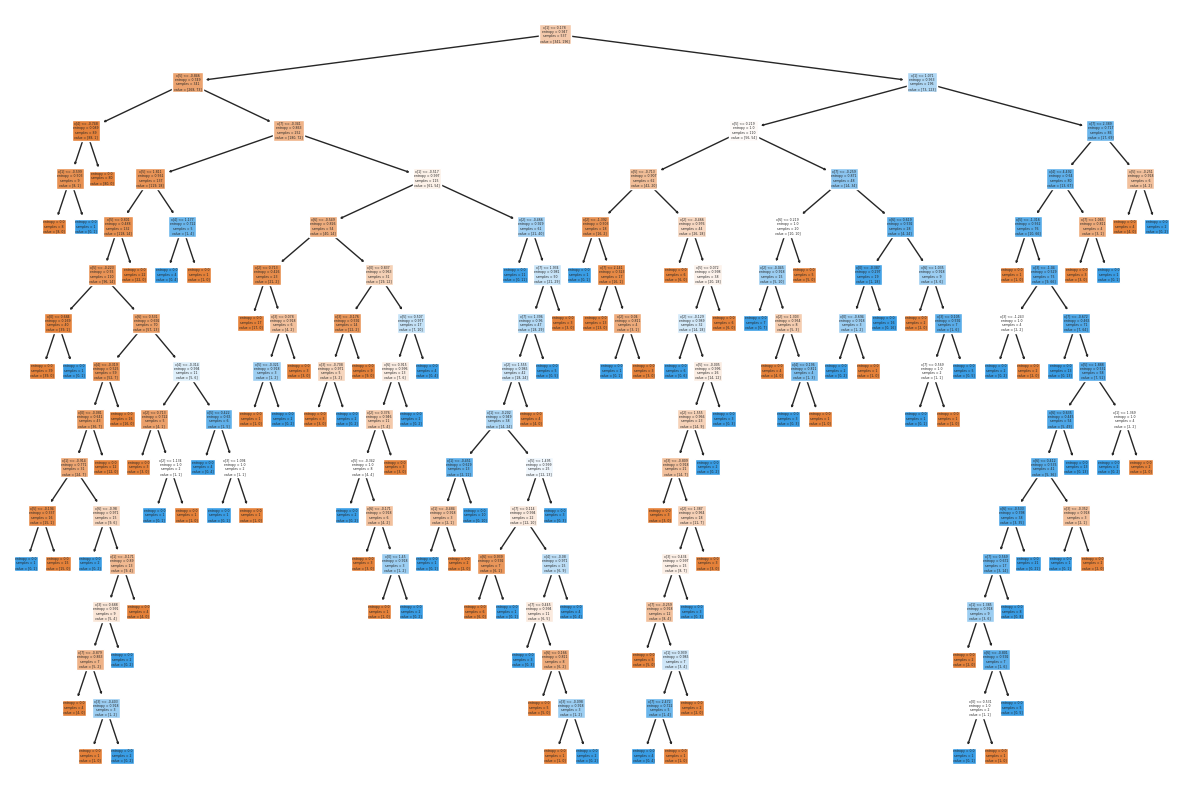

In [64]:
plt.figure(figsize=(15,10))
tree.plot_tree(Model3, filled=True)

In [65]:
y_pred3 = Model3.predict(x_test_scaled)

In [79]:
print('This is the confusion matrix for Decision Tree :\n', confusion_matrix(y_test, y_pred3))
print('\n')
print('This is the Accuracy for Decision Tree :\n', accuracy_score(y_test, y_pred3))
print('\n')
print('This is the classification report for Decision Tree :\n \n' , classification_report(y_test, y_pred3) )

This is the confusion matrix for Decision Tree :
 [[122  37]
 [ 27  45]]


This is the Accuracy for Decision Tree :
 0.7229437229437229


This is the classification report for Decision Tree :
 
               precision    recall  f1-score   support

           0       0.82      0.77      0.79       159
           1       0.55      0.62      0.58        72

    accuracy                           0.72       231
   macro avg       0.68      0.70      0.69       231
weighted avg       0.73      0.72      0.73       231



- The accuracy score for Model 3 is 0.7229437229437229

## Model - 4 Decision Tree using Hypertuning

In [127]:
parameter={
 'criterion':['gini','entropy','log_loss'],
  'splitter':['best','random'],
  'max_depth':[1,2,3,4,5],
  'max_features':['auto', 'sqrt', 'log2']   
}

In [128]:
from sklearn.model_selection import GridSearchCV


In [129]:
treeclassifier=DecisionTreeClassifier()
Model4 = GridSearchCV(treeclassifier, param_grid=parameter, cv=3, scoring='accuracy')

In [130]:
Model4.fit(x_train_scaled, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [131]:
Model4.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'sqrt',
 'splitter': 'random'}

In [136]:
Model4 = DecisionTreeClassifier(criterion = 'gini',
 max_depth = 4,
 max_features = 'sqrt',
 splitter =  'random')
Model4.fit(x_train_scaled, y_train)

DecisionTreeClassifier(max_depth=4, max_features='sqrt', splitter='random')

[Text(0.5, 0.9, 'x[2] <= 0.367\ngini = 0.464\nsamples = 537\nvalue = [341, 196]'),
 Text(0.25, 0.7, 'x[7] <= -0.886\ngini = 0.442\nsamples = 358\nvalue = [240, 118]'),
 Text(0.125, 0.5, 'x[3] <= 0.723\ngini = 0.169\nsamples = 75\nvalue = [68, 7]'),
 Text(0.0625, 0.3, 'x[6] <= -0.279\ngini = 0.03\nsamples = 65\nvalue = [64, 1]'),
 Text(0.03125, 0.1, 'gini = 0.0\nsamples = 34\nvalue = [34, 0]'),
 Text(0.09375, 0.1, 'gini = 0.062\nsamples = 31\nvalue = [30, 1]'),
 Text(0.1875, 0.3, 'x[5] <= 0.001\ngini = 0.48\nsamples = 10\nvalue = [4, 6]'),
 Text(0.15625, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.21875, 0.1, 'gini = 0.444\nsamples = 9\nvalue = [3, 6]'),
 Text(0.375, 0.5, 'x[5] <= -0.37\ngini = 0.477\nsamples = 283\nvalue = [172, 111]'),
 Text(0.3125, 0.3, 'x[6] <= 2.529\ngini = 0.37\nsamples = 110\nvalue = [83, 27]'),
 Text(0.28125, 0.1, 'gini = 0.375\nsamples = 108\nvalue = [81, 27]'),
 Text(0.34375, 0.1, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.4375, 0.3, 'x[4

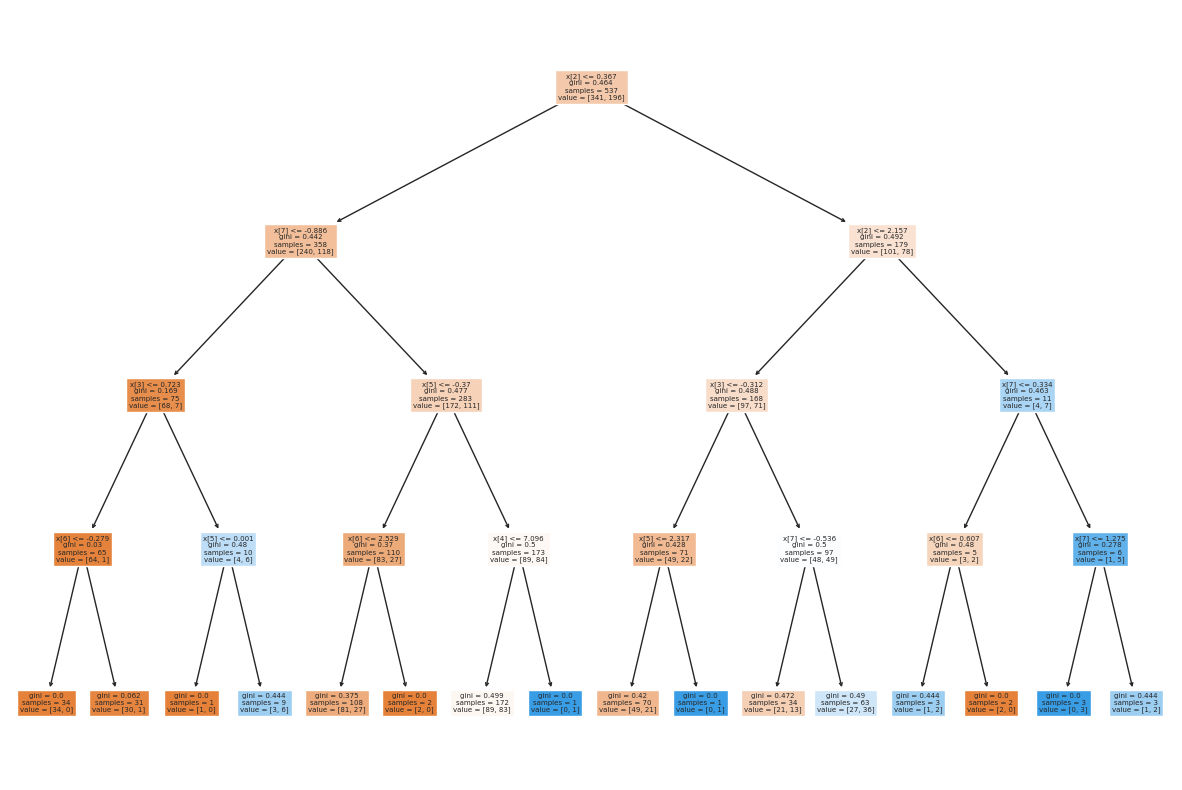

In [137]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(Model4, filled=True)

In [138]:
y_pred4 = Model4.predict(x_test_scaled)

In [139]:
print('This is the confusion matrix for Decision Tree with Hypertuning :\n', confusion_matrix(y_test, y_pred4))
print('\n')
print('This is the Accuracy for Decision Tree with Hypertuning:\n', accuracy_score(y_test, y_pred4))
print('\n')
print('This is the classification report for Decision Tree with Hypertuning :\n \n' , classification_report(y_test, y_pred4))

This is the confusion matrix for Decision Tree with Hypertuning :
 [[141  18]
 [ 55  17]]


This is the Accuracy for Decision Tree with Hypertuning:
 0.683982683982684


This is the classification report for Decision Tree with Hypertuning :
 
               precision    recall  f1-score   support

           0       0.72      0.89      0.79       159
           1       0.49      0.24      0.32        72

    accuracy                           0.68       231
   macro avg       0.60      0.56      0.56       231
weighted avg       0.65      0.68      0.65       231



- The accuracy for model 4 is 0.683982683982684

## Model - 5 Support Vector

In [111]:
## Support Vector Classifier With Hyperparameter Tuning

# defining parameter range
param_grid = {'C': [0.1, 1],
              'gamma': [1, 0.1, 0.01],
              'kernel':['linear','rbf','polynomial']
              }

In [112]:
from sklearn.svm import SVC
Model5=GridSearchCV(SVC(),param_grid=param_grid,refit=True,cv=3,scoring='accuracy')

Model5.fit(x_train_scaled,y_train)

GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [0.1, 1], 'gamma': [1, 0.1, 0.01],
                         'kernel': ['linear', 'rbf', 'polynomial']},
             scoring='accuracy')

In [113]:
Model5.best_params_

{'C': 0.1, 'gamma': 1, 'kernel': 'linear'}

In [114]:
Model5 = SVC(C=0.1, gamma=1, kernel='linear')

In [115]:
Model5

SVC(C=0.1, gamma=1, kernel='linear')

In [116]:
Model5.fit(x_train_scaled, y_train)

SVC(C=0.1, gamma=1, kernel='linear')

In [117]:
y_pred5 = Model5.predict(x_test_scaled)

In [118]:
print('This is the confusion matrix for Support Vector  :\n', confusion_matrix(y_test, y_pred5))
print('\n')
print('This is the Accuracy for Support Vector  :\n', accuracy_score(y_test, y_pred5))
print('\n')
print('This is the classification report for Support Vector  :\n \n' , classification_report(y_test, y_pred5))

This is the confusion matrix for Support Vector  :
 [[139  20]
 [ 28  44]]


This is the Accuracy for Support Vector  :
 0.7922077922077922


This is the classification report for Support Vector  :
 
               precision    recall  f1-score   support

           0       0.83      0.87      0.85       159
           1       0.69      0.61      0.65        72

    accuracy                           0.79       231
   macro avg       0.76      0.74      0.75       231
weighted avg       0.79      0.79      0.79       231



- The accuracy score of Model 5 is 0.7922077922077922

## Model - 6 Naive Bayes

In [120]:
from sklearn.naive_bayes import GaussianNB

In [121]:
Model6 = GaussianNB()

In [124]:
Model6.fit(x_train_scaled, y_train)

GaussianNB()

In [125]:
y_pred6 = Model6.predict(x_test_scaled)  

In [126]:
print('This is the confusion matrix for Naive Bayes :\n', confusion_matrix(y_test, y_pred6))
print('\n')
print('This is the Accuracy for Naive Bayes :\n', accuracy_score(y_test, y_pred6))
print('\n')
print('This is the classification report for Naive Bayes :\n \n' , classification_report(y_test, y_pred6))

This is the confusion matrix for Naive Bayes :
 [[131  28]
 [ 27  45]]


This is the Accuracy for Naive Bayes :
 0.7619047619047619


This is the classification report for Naive Bayes :
 
               precision    recall  f1-score   support

           0       0.83      0.82      0.83       159
           1       0.62      0.62      0.62        72

    accuracy                           0.76       231
   macro avg       0.72      0.72      0.72       231
weighted avg       0.76      0.76      0.76       231



- The accuracy score for Model 6 is 0.7619047619047619

In [140]:
# Based on Accuracy score, pickling model 2 
file_ptr = open('modelForPrediction.pkl','wb')
pickle.dump(Model2, file_ptr)
file_ptr.close()